In [1]:
%%html
<style>
.uline {
    text-decoration: underline;
    text-decoration-color: #0013fc;
    text-decoration-thickness: 2px;
}

.uline:hover {
    transition: color 0.25s, background-color 0.25s;
    background-color: #0013fc;
    transition-timing-function: ease-in;
    color: white;
}
</style>


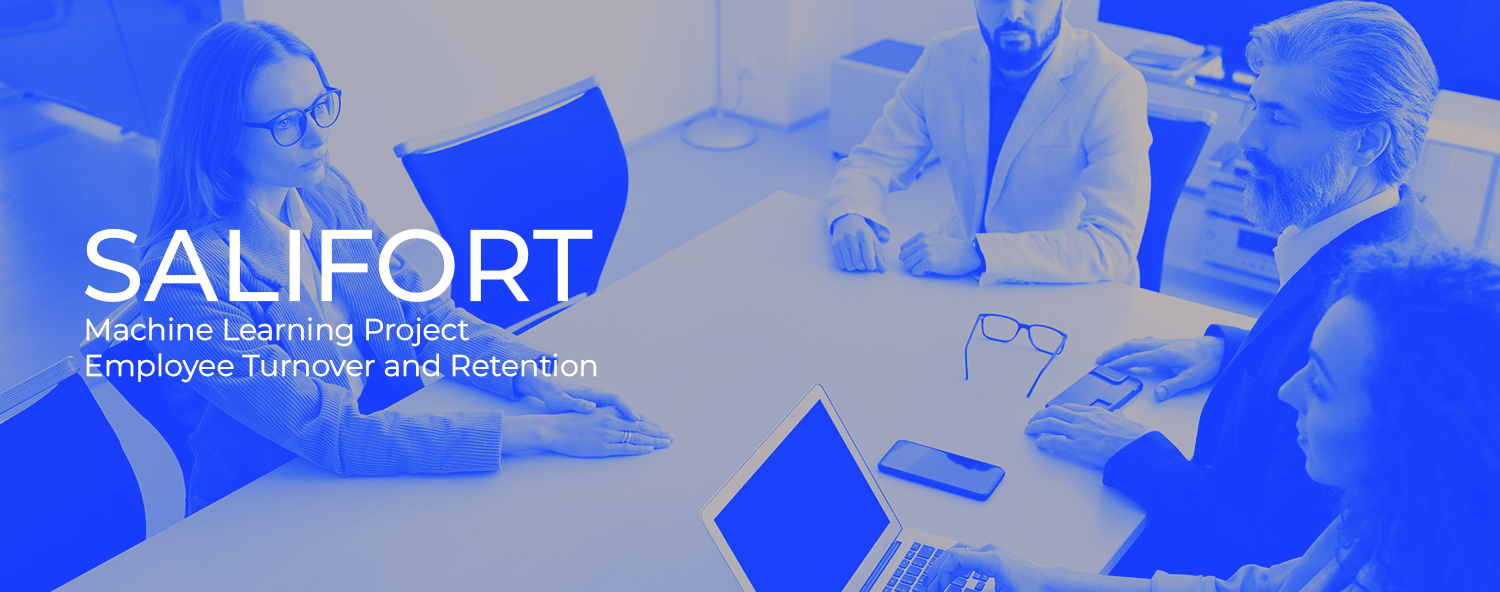
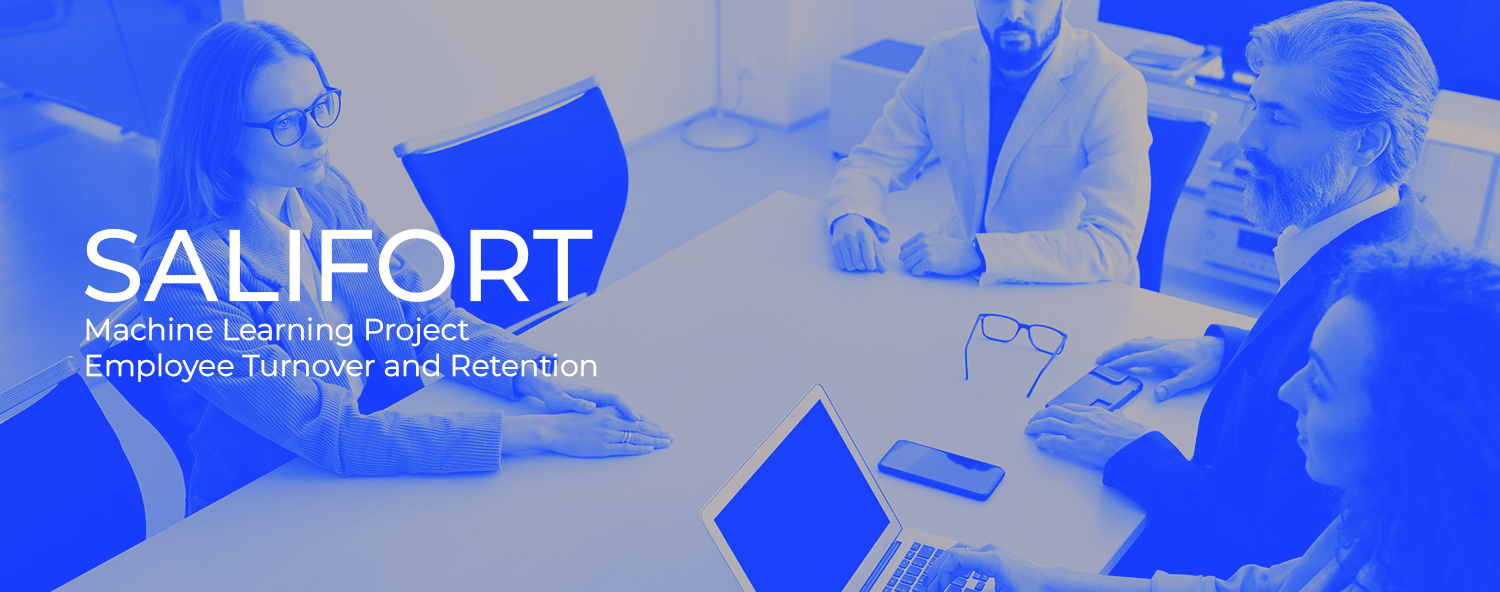

# <font color='#0013fc'>Google Advance Analytics Capstone</font>
---

# Executive Summary

⚒ work in progress

## About the company
Salifort Motors is a fictional French-based <font class='uline'>alternative energy vehicle manufacturer</font>. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.        

## Business case
As a data specialist working for Salifort Motors, you have received the results of a recent employee survey. The senior leadership team has tasked you with analyzing the data to come up with ideas for how <font class='uline'>to increase employee retention.</font> To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points you deem helpful. 

## Scenario

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development.

>Further,the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees.

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points.

> A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure.

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 

## Implementing PACE Stage

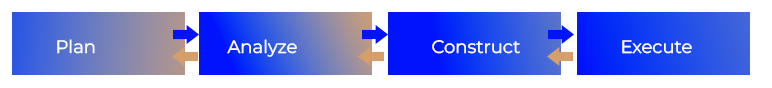

#  Plan
---
This project aims to solve the business needs of Salifort by exploring the data and building a machine learning model that will be able to predict employees who are likely to exit. The increasing employee turnover marks as a problem as hiring and interviewing candidates can be expensive. Being in a such a competitive industry, identifying the factors leading to employee turnover will help the Salifort in the long run.

## Feature Description

|Column Name|Type|Description
|---|---|---|
|satisfaction_level|int64|The employee’s self-reported satisfaction level [0-1]
|last_evaluation|int64|Score of employee's last performance review [0–1]
|number_project|int64|Number of projects employee contributes to
|average_monthly_hours|int64|Average number of hours employee worked per month
|time_spend_company|int64|How long the employee has been with the company (years)
|work_accident|int64|Whether or not the employee experienced an accident while at work
|left|int64|Whether or not the employee left the company
|promotion_last_5years|int64|Whether or not the employee was promoted in the last 5 years
|department|str|The employee's department
|salary|str|The employee's salary (low, medium, or high)

> Install requirements below to run notebook. Private Utility scripts are used for plotting .</div>

> ``!pip install plotnine pyjanitor==0.19 patchworklib --quiet``

In [3]:
# requirements
!pip install --upgrade plotnine patchworklib --quiet
!pip install pyjanitor==0.19 --quiet

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
import janitor
import janitor.ml
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

# utility script
from gp_utility.hr_script_plot import\
    plot_cat_features, plot_num_float_features,\
    plot_discrete_features, plot_binary_features_promotion,\
    plot_binary_features_accident


# module settings (pandas, seaborn, and matplotlib)
pd.options.display.max_columns = 100
sns.set(font_scale=0.8)
%matplotlib inline

# colar pallette for chart
color_pal = ['#5c86ff', '#db0049']

<Figure size 100x100 with 0 Axes>

In [6]:
def read_hr_data() -> pd.DataFrame:
    """
    :description:
    
        Read and loads + clean human resource company data.
        
    :returns: Dataframe containg the salifort data
    """
    
    # working directory local path and filename
    file_name = 'HR_comma_sep.csv'
    data_path = Path('/kaggle/input/hr-analytics-and-job-prediction/') / file_name

    # load dataframe using padnas and clean columns using pyjanitor
    df = pd.read_csv(data_path)\
        .clean_names()\
        .rename_columns({
            'left': 'exit',
            'average_montly_hours': 'average_monthly_hours'})

    return df

In [7]:
# use read hr function to load and clean data
df_original = read_hr_data()

# set a copy for wrangling purposes
df = df_original.copy()

# Cleaning

In [8]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   exit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
# check feature datatypes
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
exit                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

# Missing

In [10]:
# check for missing entries in all of our features
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
exit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

# Duplicated

In [11]:
# check for duplicate entries
duplicated_entries = df[df.duplicated()]
duplicated_entries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3008 entries, 396 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3008 non-null   float64
 1   last_evaluation        3008 non-null   float64
 2   number_project         3008 non-null   int64  
 3   average_monthly_hours  3008 non-null   int64  
 4   time_spend_company     3008 non-null   int64  
 5   work_accident          3008 non-null   int64  
 6   exit                   3008 non-null   int64  
 7   promotion_last_5years  3008 non-null   int64  
 8   department             3008 non-null   object 
 9   salary                 3008 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 258.5+ KB


In [12]:
# original data department value counts
df.department.value_counts(normalize=True) * 100

department
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: proportion, dtype: float64

#### Investigate Duplicated Entries

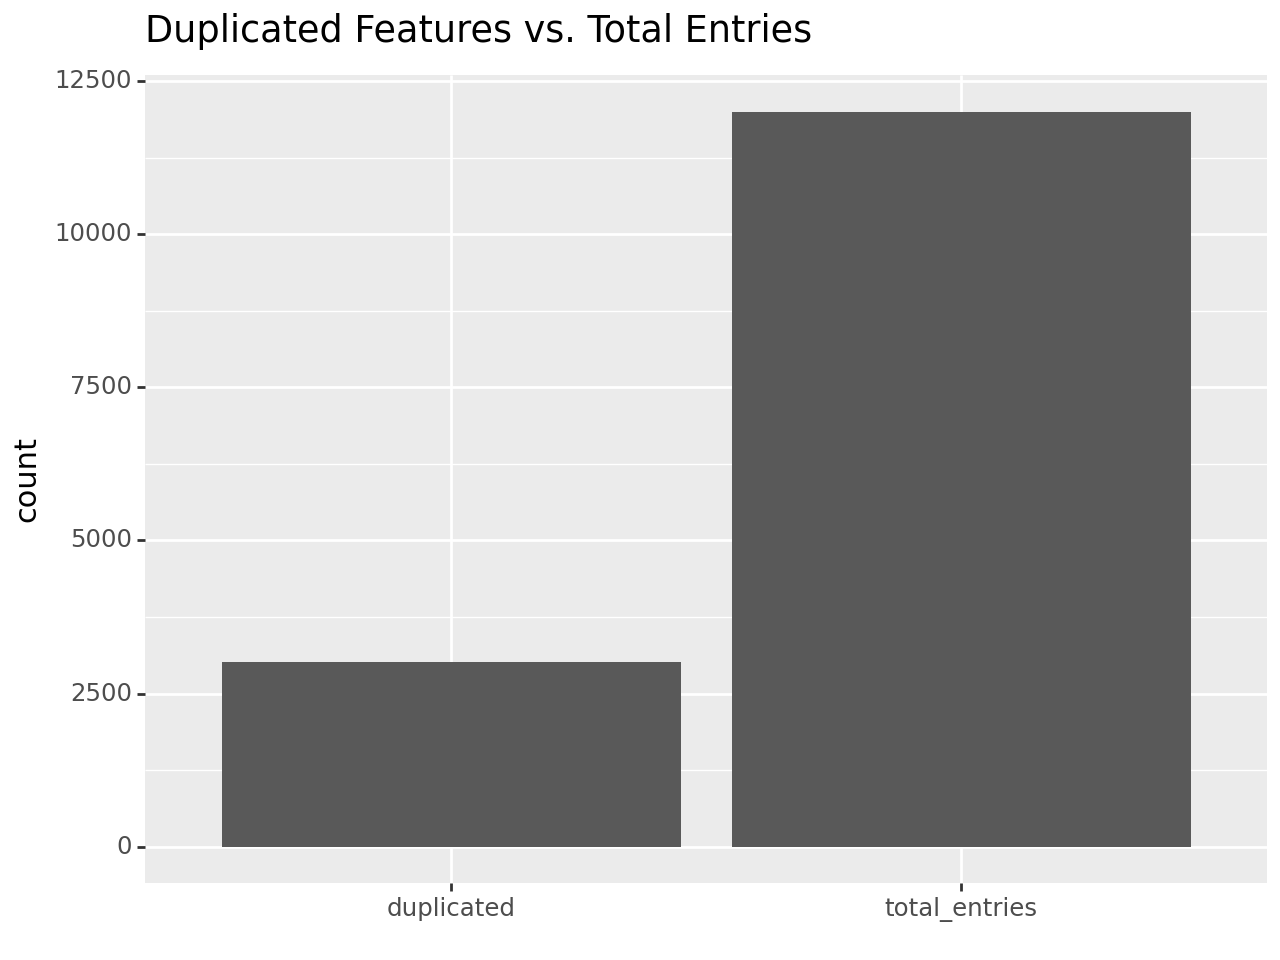

In [66]:
duplicated_data_summary = {'total_entries': [df.shape[0]], 'duplicated': [duplicated_entries.shape[0]]}
duplicated_viz = pd.melt(pd.DataFrame.from_dict(duplicated_data_summary))

duplicated_plot = (ggplot(duplicated_viz)\
    + geom_col(aes(x='variable', y='value'), position='stack')\
    + labs(y='count', x='', title='Duplicated Features vs. Total Entries')).draw();

duplicated_plot

In [15]:
duplicated_entries.exit.value_counts()

exit
1    1580
0    1428
Name: count, dtype: int64

In [16]:
np.round(duplicated_entries.department.value_counts(normalize=True) * 100, 1) 

department
sales          30.0
technical      15.8
support        13.6
IT              8.3
product_mng     7.2
management      6.4
marketing       6.2
accounting      4.9
hr              4.6
RandD           3.1
Name: proportion, dtype: float64

#### Drop Decision
---

...

In [68]:
# drop duplicated features
df = df.drop_duplicates(keep='first')

## Object Features

In [71]:
df.select_dtypes('object').describe()

,department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


In [26]:
df['exit'].value_counts(normalize=True) * 100

exit
0    83.39588
1    16.60412
Name: proportion, dtype: float64

In [27]:
plot_salary, plot_department = plot_cat_features(df)

In [ ]:
plot_salary.draw()

In [ ]:
plot_department.draw()

## Numerical Features

### Satisfaction Level & Performance Evaluation KDE

In [77]:
float_features = df.select_dtypes('float').columns.to_list()
float_features.append('exit')
float_feat_df = df[float_features]
float_feat_df.exit = float_feat_df.exit.astype('str')

In [ ]:
plot_num_float_features(float_feat_df, color_pal)

### Discrete Features Distribution by Factor of Exit

In [ ]:
# discrete features
int_features = df.select_dtypes('integer').reorder_columns(['exit'])
discrete_features = int_features[['number_project', 'average_monthly_hours', 'time_spend_company', 'exit']]
plot_discrete_features(discrete_features, color_pal)

## Binary Features

In [34]:
int_features.work_accident.value_counts(normalize=True) * 100

work_accident
0    84.571762
1    15.428238
Name: proportion, dtype: float64

In [35]:
int_features.promotion_last_5years.value_counts(normalize=True) * 100

promotion_last_5years
0    98.307064
1     1.692936
Name: proportion, dtype: float64

In [36]:
int_features.exit.value_counts(normalize=True) * 100

exit
0    83.39588
1    16.60412
Name: proportion, dtype: float64

#### Promotion

In [ ]:
plot_binary_features_promotion(int_features, color_pal)

#### Work Accident

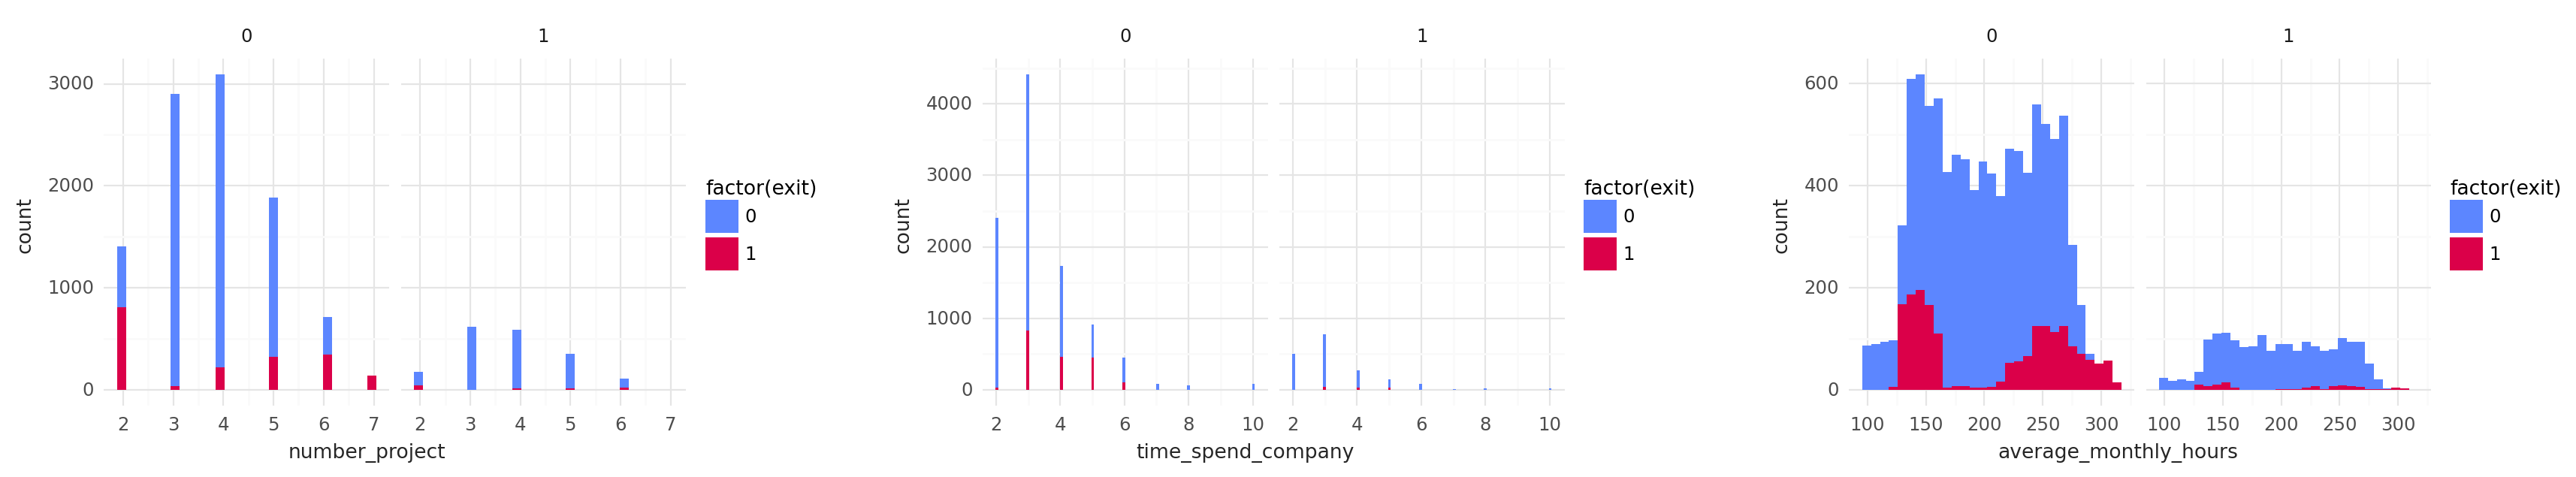

In [38]:
plot_binary_features_accident(int_features, color_pal)

## Scatter Matrix

In [ ]:
sns.set_style("whitegrid")
mat = sns.pairplot(int_features, hue='exit', palette=color_pal, markers='.', diag_kws={'alpha': 0.5}, plot_kws={'alpha': 0.5})
mat.fig.set_size_inches(15, 15)

## Unsupervised Machine Learning

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_score
import patchworklib as pw

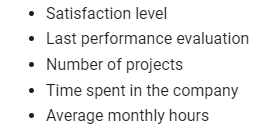

### KMeans

In [55]:
def kmeans_inertia(num_clusters, x_vals) -> list:

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init='auto')
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
        
    return inertia

def kmeans_sil(num_clusters, x_vals) -> list:
    
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
        
    return sil_score

def plot_kmean_feat(x_feat) -> ggplot:
    
    values = ['#5c86ff', '#db0049', "#EBD323"]
    g_plot = (ggplot(scaled_important_features)\
        + geom_point(aes(x=x_feat, y='satisfaction_level', fill='factor(clusters)'), alpha=0.3)\
        + scale_fill_manual(values=values, labels=[0, 1, 2])\
        + theme_minimal())
    return g_plot
    
def save_kmean_3_cluster_plots() -> Iterator[]:
    
    x_features = ['last_evaluation', 'average_monthly_hours', 'number_project', 'time_spend_company']
    values = ['#FFA500', '#9467bd', '#008080']
    
    for feat in x_features:
        g = ggplot(scaled_important_features)\
            + geom_point(aes(x=feat, y='satisfaction_level', fill='factor(clusters)'), alpha=0.3)\
            + scale_fill_manual(values=values, labels=[0, 1, 2])\
            + theme_minimal()
        
        yield g

In [48]:
# select important features from ensemble models
important_features = df.select_dtypes('number').iloc[:, :-3]
scaled_features = StandardScaler().fit_transform(important_features)
scaled_important_features = pd.DataFrame(scaled_features, columns=important_features.columns)

# use elbow method to decide for number of clusters
num_clusters = [i for i in range(2, 11)]
inertia = kmeans_inertia(num_clusters, scaled_important_features)

In [49]:
# create an inertia line plot using plotly express
inertia_plot = px.line(x=num_clusters, y=inertia)\
    .update_layout(template='plotly_white', width=800, height=480,
                   title='<b>Elbow Method</b> / n_clusters=1-10')\
    .update_traces(marker={'color': 'black'})

inertia_plot

In [50]:
# create a silhouette score line plot using plotly express
sil_score = kmeans_sil(num_clusters, scaled_important_features)
sil_plot = px.line(x=num_clusters, y=sil_score)\
    .update_layout(template='plotly_white', width=800, height=480,
                  title='<b>Silhouette Score line</b> / n_clusters=1-10')\

sil_plot

In [51]:
# KMeans clusters of 2 (0, 1, 2)
km3 = KMeans(n_clusters=3, random_state=4).fit(scaled_important_features)
scaled_important_features['clusters'] = km3.labels_

# patch plots from kmeans output
feat_to_plot = ["last_evaluation", "average_monthly_hours", "number_project", "time_spend_company"]
plot_collection = [plot_kmean_feat(i) for i in feat_to_plot]
plot_g = [pw.load_ggplot(plot, figsize=(5,3)) for plot in plot_collection]
plot_mat_g = ((plot_g[0]|plot_g[1])/(plot_g[2]|plot_g[3]))

# save kmeans plot to pdf
save_as_pdf_pages(save_kmean_3_cluster_plots())